LIBRARY

In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sn[s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOAD DATA**

In [ ]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_column', 500)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/risk_factors_cervical_cancer.csv')

**DATA EXPLORATION**

In [ ]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
data.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.shape

(858, 36)

In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


EDA

DATA PREPROCESSING

In [ ]:
column_names = data.columns.to_numpy()
attribute_names = column_names[:-4]
target_names = column_names[-4:]
print(f'Ini adalah feature dari data: \n {attribute_names}')

print(f'\n Ini adalah target dari data: \n {target_names}')

Ini adalah feature dari data: 
 ['Age' 'Number of sexual partners' 'First sexual intercourse'
 'Num of pregnancies' 'Smokes' 'Smokes (years)' 'Smokes (packs/year)'
 'Hormonal Contraceptives' 'Hormonal Contraceptives (years)' 'IUD'
 'IUD (years)' 'STDs' 'STDs (number)' 'STDs:condylomatosis'
 'STDs:cervical condylomatosis' 'STDs:vaginal condylomatosis'
 'STDs:vulvo-perineal condylomatosis' 'STDs:syphilis'
 'STDs:pelvic inflammatory disease' 'STDs:genital herpes'
 'STDs:molluscum contagiosum' 'STDs:AIDS' 'STDs:HIV' 'STDs:Hepatitis B'
 'STDs:HPV' 'STDs: Number of diagnosis' 'STDs: Time since first diagnosis'
 'STDs: Time since last diagnosis' 'Dx:Cancer' 'Dx:CIN' 'Dx:HPV' 'Dx']

 Ini adalah target dari data: 
 ['Hinselmann' 'Schiller' 'Citology' 'Biopsy']


In [ ]:
data = data.replace("?", np.nan)

data.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
data2 = data

data = data.fillna(data.median())
data.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
x = data[attribute_names]
y_hinselmann = data[['Hinselmann']]
y_schiller = data[['Schiller']]
y_citology = data[['Citology']]
y_biopsy = data[['Biopsy']]

x = x.astype(float)
y_hinselmann = y_hinselmann.astype(float)
y_schiller= y_schiller.astype(float)
y_citology = y_citology.astype(float)
y_biopsy = y_biopsy.astype(float)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [ ]:
y_hinselmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hinselmann  858 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [ ]:
y_schiller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Schiller  858 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [ ]:
y_citology.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Citology  858 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [ ]:
y_biopsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Biopsy  858 non-null    float64
dtypes: float64(1)
memory usage: 6.8 KB


In [ ]:
print(x.shape)
print(y_hinselmann.shape)
print(y_schiller.shape)
print(y_citology.shape)
print(y_biopsy.shape)

(858, 32)
(858, 1)
(858, 1)
(858, 1)
(858, 1)


Test dataset

In [ ]:
data3 = data2
data4 = data2

In [ ]:
x2 = x

Data Visualization

<ipython-input-50-58bcdcb1fb39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


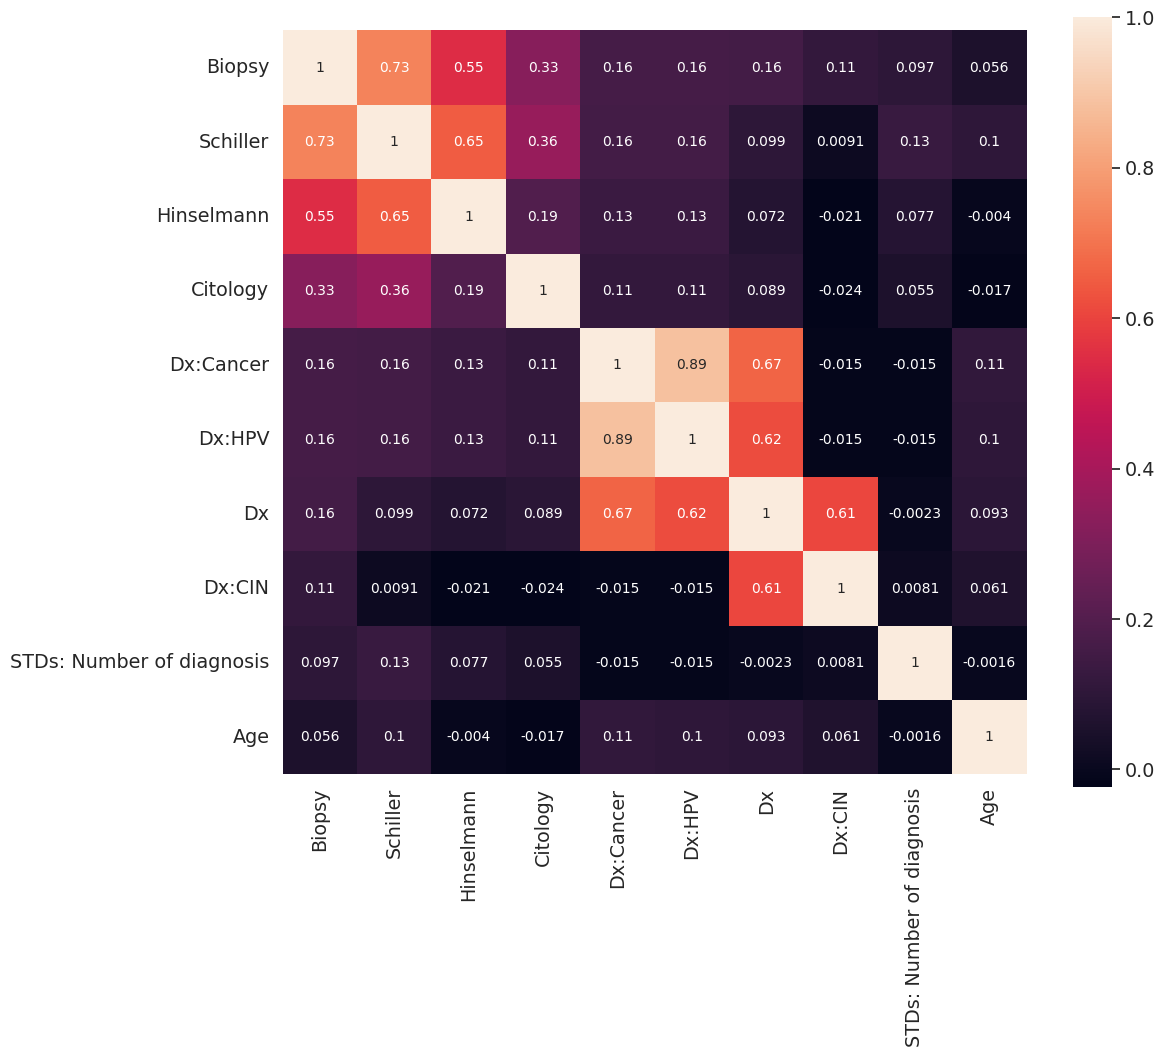

In [ ]:

corr = data.corr()

k = 15

cols = corr.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

<Axes: xlabel='Dx:HPV', ylabel='count'>

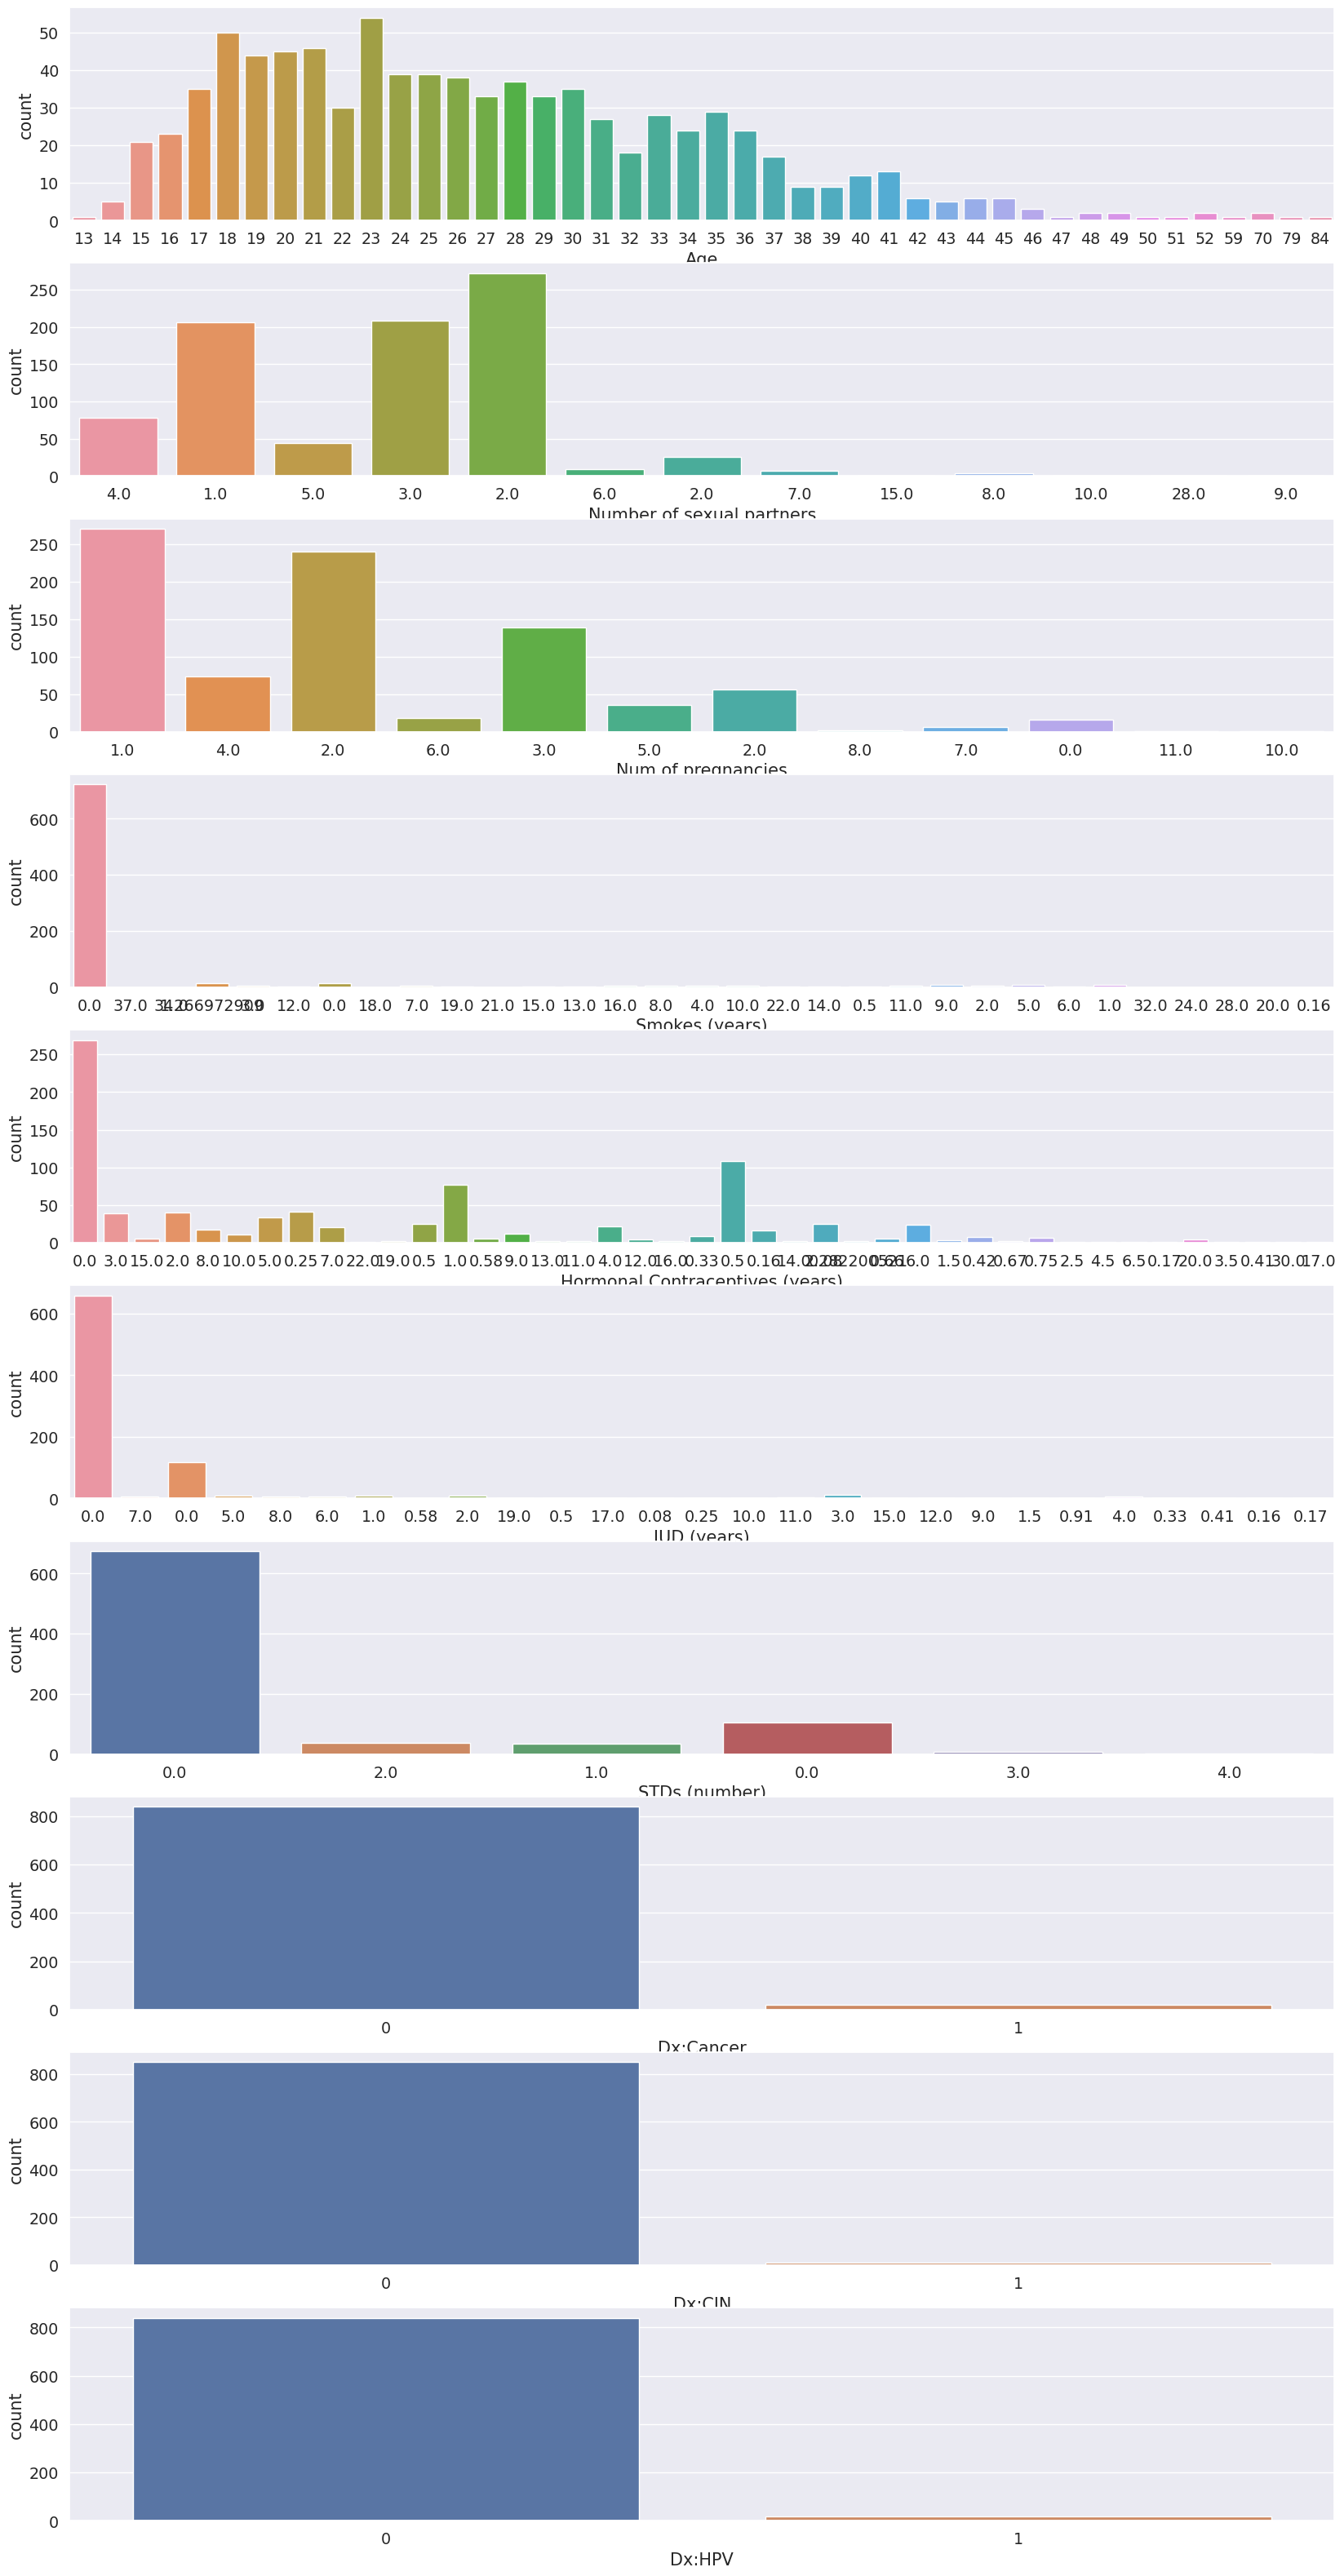

In [ ]:
import seaborn as sns
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10) = plt.subplots(10, 1, figsize = (20,40))
sns.countplot(x='Age', data=data, ax=ax1)
sns.countplot(x='Number of sexual partners', data=data, ax=ax2)
sns.countplot(x='Num of pregnancies', data=data, ax=ax3)
sns.countplot(x='Smokes (years)', data=data, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=data, ax=ax5)
sns.countplot(x='IUD (years)', data=data, ax=ax6)
sns.countplot(x='STDs (number)', data=data, ax=ax7)
sns.countplot(x='Dx:Cancer', data=data, ax=ax8)
sns.countplot(x='Dx:CIN', data=data, ax=ax9)
sns.countplot(x='Dx:HPV', data=data, ax=ax10)

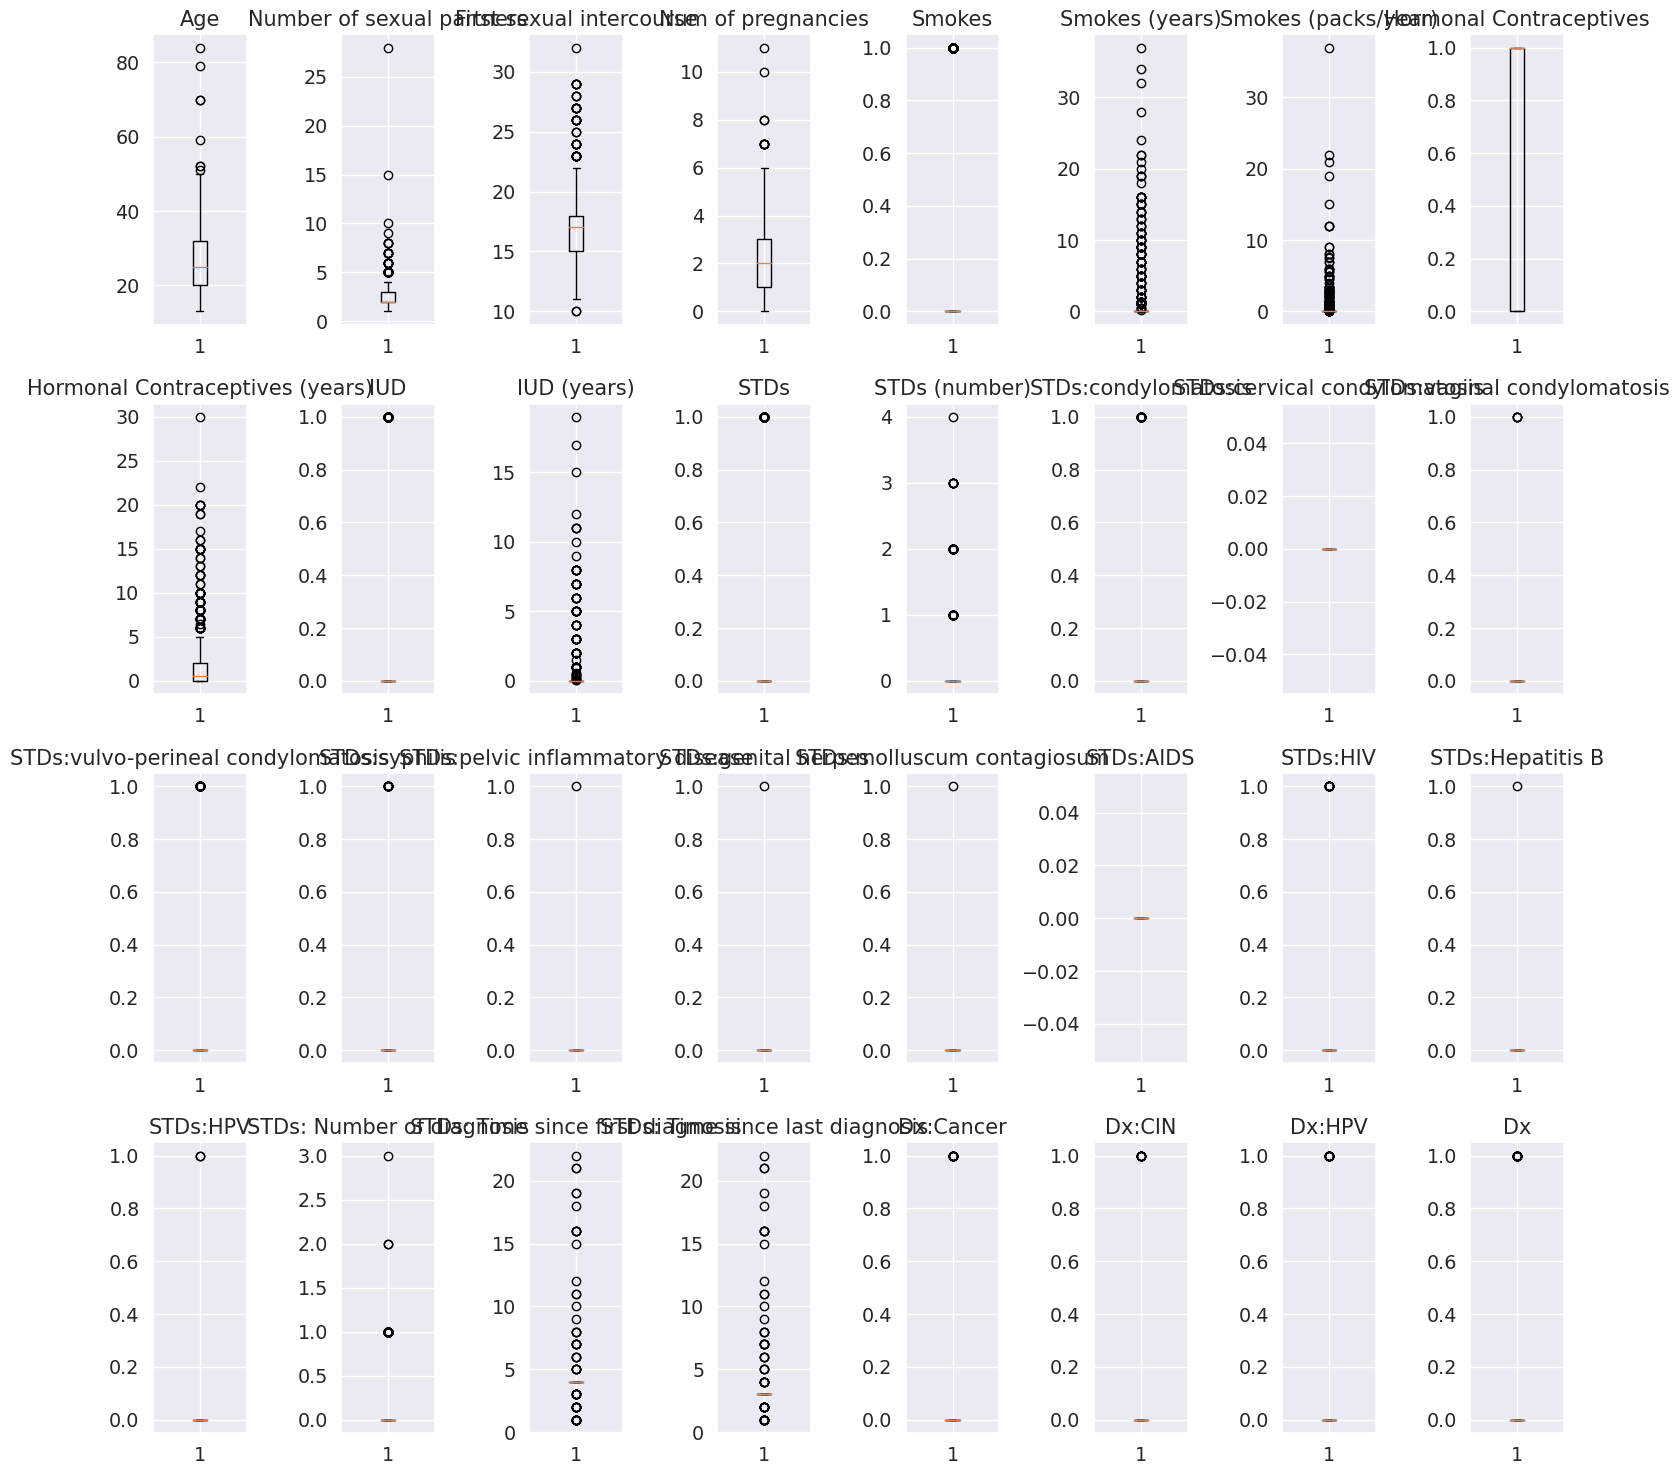

In [ ]:
# Determine the number of rows and columns in the subplots grid
n_rows, n_cols = 4, 8  # You can adjust this based on your preference

# Create subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))

# Initialize row and column indices
row, col = 0, 0

# Loop through the columns in your DataFrame
for i, column in enumerate(x.columns):
    if col == n_cols and row < n_rows:
        col = 0
        row += 1

    ax[row, col].boxplot(x[column])
    ax[row, col].set_title(column)

    col += 1

# Remove any empty subplots
for i in range(len(x.columns), n_rows * n_cols):
    fig.delaxes(ax[row, col])
    col += 1

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

MODEL

In [ ]:
model = tf.keras.models.Sequential([

      tf.keras.layers.Dense(48, activation='relu', input_dim=32),
      tf.keras.layers.Dense(36, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 48)                1584      
                                                                 
 dense_4 (Dense)             (None, 36)                1764      
                                                                 
 dense_5 (Dense)             (None, 1)                 37        
                                                                 
Total params: 3385 (13.22 KB)
Trainable params: 3385 (13.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = model.fit(x, y_hinselmann, epochs = 100, validation_split = 0.2, verbose = 2)

Epoch 1/100
22/22 - 2s - loss: 0.6547 - accuracy: 0.7376 - val_loss: 0.1105 - val_accuracy: 0.9826 - 2s/epoch - 84ms/step
Epoch 2/100
22/22 - 0s - loss: 0.2593 - accuracy: 0.9534 - val_loss: 0.1048 - val_accuracy: 0.9826 - 118ms/epoch - 5ms/step
Epoch 3/100
22/22 - 0s - loss: 0.2091 - accuracy: 0.9534 - val_loss: 0.1077 - val_accuracy: 0.9826 - 116ms/epoch - 5ms/step
Epoch 4/100
22/22 - 0s - loss: 0.1937 - accuracy: 0.9534 - val_loss: 0.1043 - val_accuracy: 0.9826 - 120ms/epoch - 5ms/step
Epoch 5/100
22/22 - 0s - loss: 0.1865 - accuracy: 0.9534 - val_loss: 0.1081 - val_accuracy: 0.9826 - 119ms/epoch - 5ms/step
Epoch 6/100
22/22 - 0s - loss: 0.1838 - accuracy: 0.9534 - val_loss: 0.1085 - val_accuracy: 0.9826 - 127ms/epoch - 6ms/step
Epoch 7/100
22/22 - 0s - loss: 0.1811 - accuracy: 0.9534 - val_loss: 0.1092 - val_accuracy: 0.9826 - 105ms/epoch - 5ms/step
Epoch 8/100
22/22 - 0s - loss: 0.1788 - accuracy: 0.9519 - val_loss: 0.1085 - val_accuracy: 0.9826 - 116ms/epoch - 5ms/step
Epoch 9/10

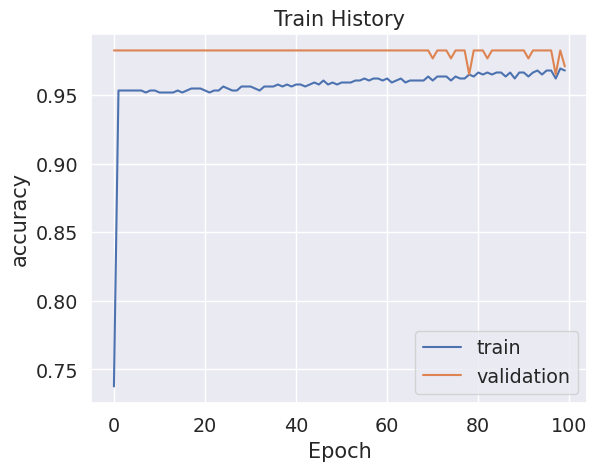

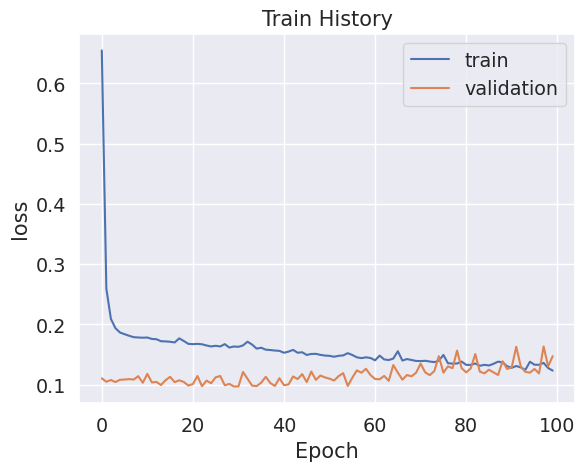

In [ ]:
def show_history(history, train, validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

#visualize the loss and accuracy after each epoch
show_history(history,'accuracy','val_accuracy')
show_history(history,'loss','val_loss')

In [ ]:
#Schiller
history2 = model.fit(x, y_schiller, epochs = 100, validation_split = 0.2, verbose = 2)

Epoch 1/100
22/22 - 0s - loss: 0.3154 - accuracy: 0.9257 - val_loss: 0.4180 - val_accuracy: 0.8721 - 283ms/epoch - 13ms/step
Epoch 2/100
22/22 - 0s - loss: 0.2827 - accuracy: 0.9227 - val_loss: 0.3989 - val_accuracy: 0.9012 - 76ms/epoch - 3ms/step
Epoch 3/100
22/22 - 0s - loss: 0.2770 - accuracy: 0.9271 - val_loss: 0.3740 - val_accuracy: 0.8837 - 91ms/epoch - 4ms/step
Epoch 4/100
22/22 - 0s - loss: 0.2610 - accuracy: 0.9300 - val_loss: 0.3553 - val_accuracy: 0.8895 - 91ms/epoch - 4ms/step
Epoch 5/100
22/22 - 0s - loss: 0.2546 - accuracy: 0.9242 - val_loss: 0.3402 - val_accuracy: 0.8895 - 81ms/epoch - 4ms/step
Epoch 6/100
22/22 - 0s - loss: 0.2387 - accuracy: 0.9344 - val_loss: 0.3427 - val_accuracy: 0.8895 - 80ms/epoch - 4ms/step
Epoch 7/100
22/22 - 0s - loss: 0.2440 - accuracy: 0.9271 - val_loss: 0.3348 - val_accuracy: 0.8895 - 88ms/epoch - 4ms/step
Epoch 8/100
22/22 - 0s - loss: 0.2483 - accuracy: 0.9315 - val_loss: 0.3563 - val_accuracy: 0.8721 - 88ms/epoch - 4ms/step
Epoch 9/100
22

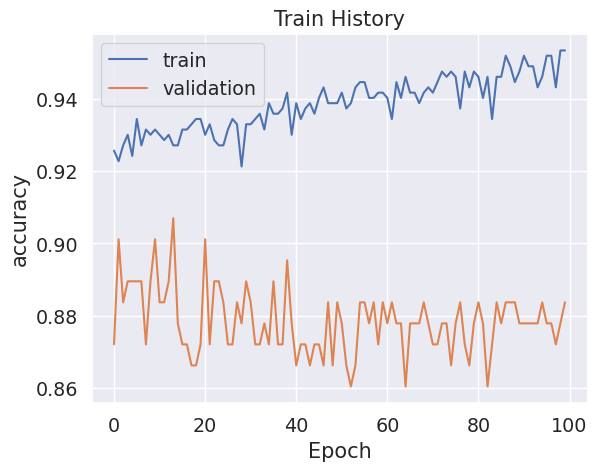

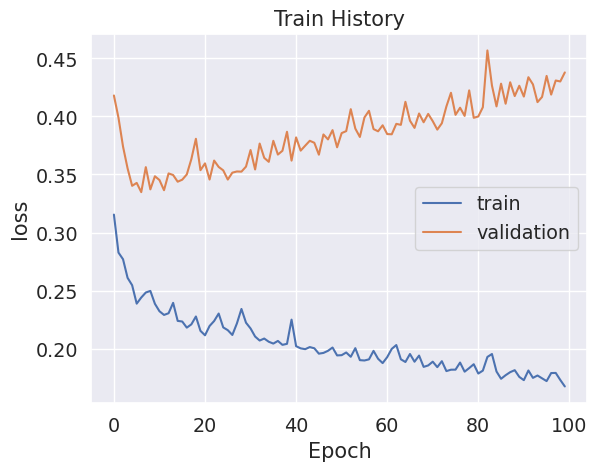

In [ ]:
def show_history(history2, train, validation):
    plt.plot(history2.history[train])
    plt.plot(history2.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

#visualize the loss and accuracy after each epoch
show_history(history2,'accuracy','val_accuracy')
show_history(history2,'loss','val_loss')

In [ ]:
#Citology
history3 = model.fit(x, y_citology, epochs = 100, validation_split = 0.2, verbose = 2)

Epoch 1/100
22/22 - 0s - loss: 0.3000 - accuracy: 0.9417 - val_loss: 0.3953 - val_accuracy: 0.8895 - 277ms/epoch - 13ms/step
Epoch 2/100
22/22 - 0s - loss: 0.2430 - accuracy: 0.9388 - val_loss: 0.2657 - val_accuracy: 0.9477 - 74ms/epoch - 3ms/step
Epoch 3/100
22/22 - 0s - loss: 0.2208 - accuracy: 0.9417 - val_loss: 0.2511 - val_accuracy: 0.9244 - 99ms/epoch - 4ms/step
Epoch 4/100
22/22 - 0s - loss: 0.1978 - accuracy: 0.9402 - val_loss: 0.2326 - val_accuracy: 0.9419 - 78ms/epoch - 4ms/step
Epoch 5/100
22/22 - 0s - loss: 0.1962 - accuracy: 0.9431 - val_loss: 0.2430 - val_accuracy: 0.9419 - 78ms/epoch - 4ms/step
Epoch 6/100
22/22 - 0s - loss: 0.1860 - accuracy: 0.9475 - val_loss: 0.2376 - val_accuracy: 0.9419 - 75ms/epoch - 3ms/step
Epoch 7/100
22/22 - 0s - loss: 0.1858 - accuracy: 0.9475 - val_loss: 0.2474 - val_accuracy: 0.9186 - 85ms/epoch - 4ms/step
Epoch 8/100
22/22 - 0s - loss: 0.1799 - accuracy: 0.9490 - val_loss: 0.2448 - val_accuracy: 0.9419 - 78ms/epoch - 4ms/step
Epoch 9/100
22

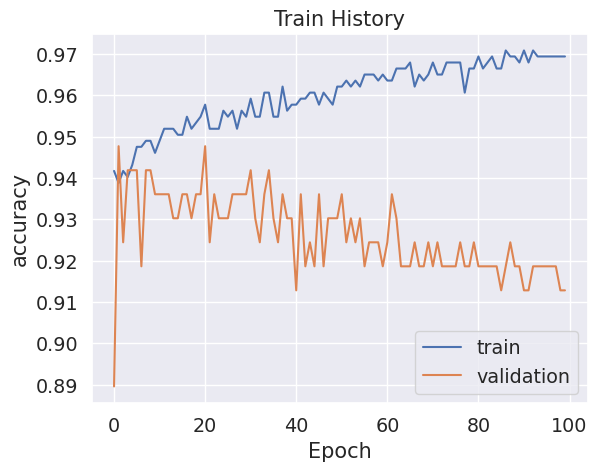

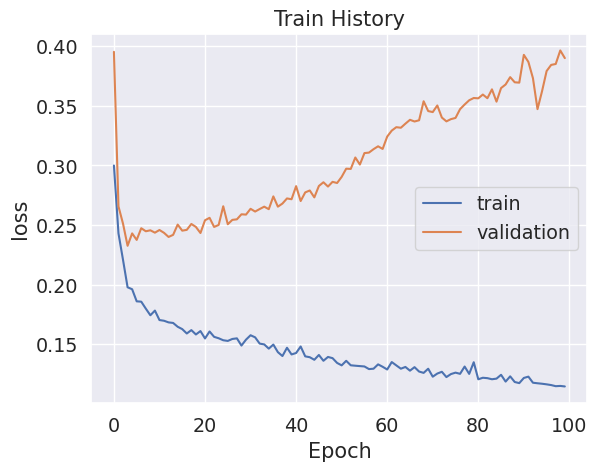

In [ ]:
def show_history(history3, train, validation):
    plt.plot(history3.history[train])
    plt.plot(history3.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

#visualize the loss and accuracy after each epoch
show_history(history3,'accuracy','val_accuracy')
show_history(history3,'loss','val_loss')

In [ ]:
#Biopsy
history4 = model.fit(x, y_biopsy, epochs = 100, validation_split = 0.2, verbose = 2)

Epoch 1/100
22/22 - 1s - loss: 0.3106 - accuracy: 0.9213 - val_loss: 0.4326 - val_accuracy: 0.8953 - 527ms/epoch - 24ms/step
Epoch 2/100
22/22 - 0s - loss: 0.2477 - accuracy: 0.9388 - val_loss: 0.4000 - val_accuracy: 0.9070 - 118ms/epoch - 5ms/step
Epoch 3/100
22/22 - 0s - loss: 0.2202 - accuracy: 0.9359 - val_loss: 0.3810 - val_accuracy: 0.8895 - 105ms/epoch - 5ms/step
Epoch 4/100
22/22 - 0s - loss: 0.2051 - accuracy: 0.9461 - val_loss: 0.3798 - val_accuracy: 0.8953 - 123ms/epoch - 6ms/step
Epoch 5/100
22/22 - 0s - loss: 0.1835 - accuracy: 0.9431 - val_loss: 0.3910 - val_accuracy: 0.8953 - 115ms/epoch - 5ms/step
Epoch 6/100
22/22 - 0s - loss: 0.1705 - accuracy: 0.9475 - val_loss: 0.3977 - val_accuracy: 0.8779 - 129ms/epoch - 6ms/step
Epoch 7/100
22/22 - 0s - loss: 0.1660 - accuracy: 0.9504 - val_loss: 0.4135 - val_accuracy: 0.8837 - 143ms/epoch - 7ms/step
Epoch 8/100
22/22 - 0s - loss: 0.1686 - accuracy: 0.9490 - val_loss: 0.3981 - val_accuracy: 0.8837 - 127ms/epoch - 6ms/step
Epoch 9

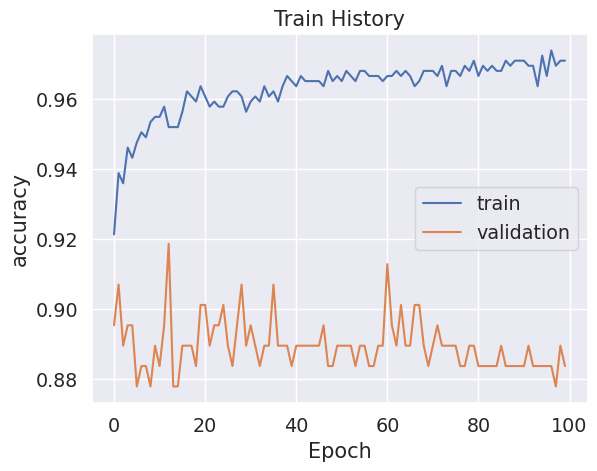

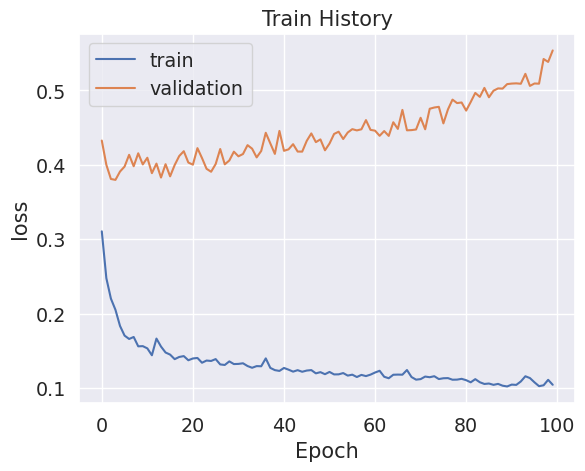

In [ ]:
def show_history(history4, train, validation):
    plt.plot(history4.history[train])
    plt.plot(history4.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

#visualize the loss and accuracy after each epoch
show_history(history4,'accuracy','val_accuracy')
show_history(history4,'loss','val_loss')